0차원 스칼라
1차원 벡터
2차원 배열(행렬)
3차원 텐서 

를 각각 만들고 출력값을 확인하시오

In [1]:
import tensorflow as tf

""" 0차원 스칼라 """
scalar = tf.constant(10.)
print(scalar.shape)

""" 1차원 벡터 """
vector = tf.constant([10 ,20, 30])
print(vector.shape)

""" 2차원 행렬 """ 
matrix = tf.constant([[10 ,20, 30], [10 ,20, 30]])
print(matrix.shape)

""" 3차원 텐서 """
tensor = tf.constant([[[10 ,20 ,30], [10, 20, 30]], [[10, 20, 30], [10, 20, 30]]])
print(tensor.shape)

Metal device set to: ()
(3,)
(2, 3)
(2, 2, 3)
Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



1차원 가변 Vector

2차원 가변 배열(행렬)

3차원 가면 텐서

를 각각 만들고 데이터를 각각 추가한 뒤 출력값을 확인하시오

In [5]:
import tensorflow as tf 

""" 1차원 가변 벡터 """
empty_vector = tf.zeros(shape = (0,))
new_vecotr = tf.constant([10. ,20 ,30])
concat_data = tf.concat([empty_vector, new_vecotr], axis = 0)
print(concat_data)

""" matrix """
empty_matrix = tf.zeros(shape = (0, 3))
new_matrix = tf.constant([[10. ,20 ,30], [10, 20, 30], [10, 20, 30]])
concat_data = tf.concat([empty_matrix, new_matrix], axis = 0)
print(concat_data)

""" tensor """
empty_tensor = tf.zeros(shape = (0 ,2 ,2))
new_tensor = tf.constant([[[10., 20], [10, 20]], [[10 ,20], [10, 20]]])
concat_data = tf.concat([empty_tensor, new_tensor], axis = 0)
print(concat_data)



tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor(
[[10. 20. 30.]
 [10. 20. 30.]
 [10. 20. 30.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[[10. 20.]
  [10. 20.]]

 [[10. 20.]
  [10. 20.]]], shape=(2, 2, 2), dtype=float32)


### Dataset for Regression

8, 5 짜리 normal distribution을 따르고 평균이 0이고 표준편차가 1인 x

1, 2, 3, 4, 5를 가지며 float32인 t_weights

10을 가지며 float32인 t_bias 

를 affine function연산 수행 후 shape을 확인하시오

In [11]:
import tensorflow as tf 

N, n_feature = 8, 5

t_weights = tf.constant([1, 2, 3, 4, 5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)
x = tf.random.normal(shape = (8, 5), mean = 0, stddev = 1)

y = tf.reduce_sum(t_weights * x, axis = 1) + t_bias
print(y.shape)


(8,)


### Dataset for Binary Classification

8, 5 짜리 normal distribution을 따르고 평균이 0이고 표준편차가 1인 x

1, 2, 3, 4, 5를 가지며 float32인 t_weights

10을 가지며 float32인 t_bias 

를 affine function연산 수행 후 5 이상인 수치에 대해서는 1 그 밖은 0으로 출력하도록 하고 값을 확인하시오

In [14]:
import tensorflow as tf 

N, n_feature = 8, 5

t_weights = tf.constant([1, 2, 3, 4 ,5], dtype = tf.float32)
t_bias = tf.constant([10], dtype = tf.float32)

x = tf.random.normal(shape = (N, n_feature), mean = 0, stddev = 1)

y = tf.reduce_sum(t_weights * x, axis = 1) + t_bias

print(y > 5)
y = tf.cast(y > 5, dtype = tf.int32)
print(y)


tf.Tensor([ True  True False  True  True False  True  True], shape=(8,), dtype=bool)
tf.Tensor([1 1 0 1 1 0 1 1], shape=(8,), dtype=int32)


### Dataset for Multi-class Classification

3class 분류 dataset을 생성하시오 

8개의 데이터는 2개의 특징을 가지고 있다.




(8,)
(8,)
(8,)
(8,)
(8,)
(8,)


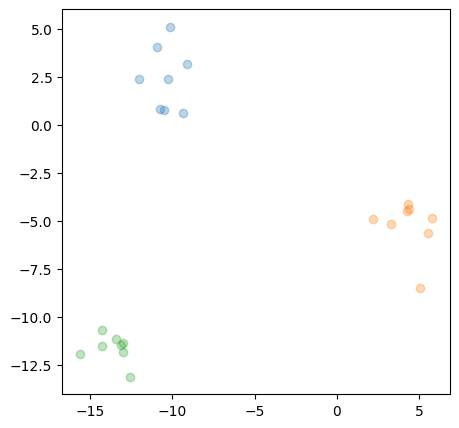

In [22]:
import tensorflow as tf 
import matplotlib.pyplot as plt

tf.random.set_seed(3)

N, n_feature = 8, 2
n_class = 3

X = tf.zeros(shape = (0, n_feature))
Y = tf.zeros(shape = (0,), dtype = tf.int32)

fig, ax = plt.subplots(figsize = (5, 5))
for class_idx in range(n_class):
    center = tf.random.uniform(minval = -15, maxval = 15, shape = (2, ))

    x1 = center[0] + tf.random.normal(shape = (N, 1))
    x2 = center[1] + tf.random.normal(shape = (N, 1))
    
    x = tf.concat((x1, x2), axis = 1)
    
    y = class_idx * tf.ones(shape = (N, ), dtype = tf.int32)
    
    print(x[:, 0].shape)
    print(x[:, 1].shape)
    ax.scatter(x[:,0].numpy(), x[:,1].numpy(), alpha = 0.3)
    
    X = tf.concat((X, x), axis = 0)
    Y = tf.concat((Y, y), axis = 0)




### Dataset for Multi-class Classification with One-hot Encoding

3class 분류 dataset을 생성하시오 

8개의 데이터는 2개의 특징을 가지고 있다.

[[ -9.32379      0.63441634]
 [-10.284907     2.379104  ]
 [ -9.124892     3.1632388 ]
 [-10.155995     5.1037564 ]
 [-12.013144     2.3951974 ]
 [-10.723062     0.83566296]
 [-10.489759     0.7615824 ]
 [-10.951565     4.0525527 ]
 [  5.536338    -5.62978   ]
 [  5.76781     -4.842551  ]
 [  4.2800665   -4.4587307 ]
 [  4.4007945   -4.3808784 ]
 [  4.3090057   -4.109671  ]
 [  3.299302    -5.164282  ]
 [  2.1642792   -4.8752728 ]
 [  5.027039    -8.509354  ]
 [-15.617774   -11.937093  ]
 [-14.294315   -11.4917145 ]
 [-12.543969   -13.106331  ]
 [-12.981747   -11.833797  ]
 [-13.088761   -11.444979  ]
 [-13.387175   -11.164747  ]
 [-14.235947   -10.6895    ]
 [-12.998525   -11.369796  ]]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


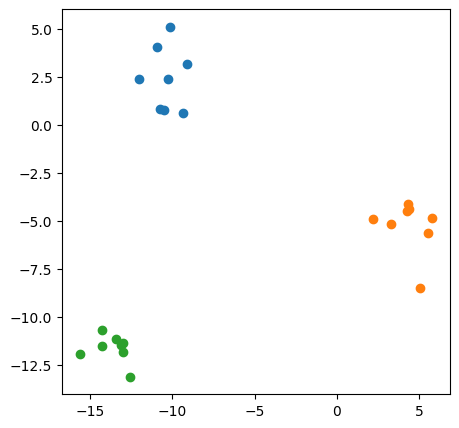

### Dataset Object

100, 5 짜리 normal distribution을 따르고 평균이 0이고 표준편차가 1인 x

1, 2, 3, 4, 5를 가지며 float32인 t_weights

10을 가지며 float32인 t_bias 

affine function연산 수행 

조건 

배치 = 32

데이터 셋을 생성

suffle 수행




(32, 5) (32,)
(4, 5) (4,)
(32, 5) (32,)
(32, 5) (32,)


### MSE Calculation

batch size 가 32인 예측값과 라벨을 각각 만들고 

이 값들에 대해 tensorflow 제공 MSE를 사용하여 차이를 확인해 보고 MSE를 직접 구현해서 차이가 있는지 확인하시오

tf.Tensor(1.2769399, shape=(), dtype=float32) tf.Tensor(1.2769399, shape=(), dtype=float32)


### MSE with Model/Dataset

100개의 데이터 5개의 특징 

32 배치

데이터셋화

뉴런 1개 인 linear 모델을 통과시킨 후 

y값과 prediction 값의 loss를 계산하시오

2.0344756
3.0350947
2.384056
2.3896272


### Binary Cross Entropy Calculation

batch_size = 4

n_class = 2

인 데이터를 Binary Cross Entropy loss function에 넣어 값을 확인해 보고 

Binary Cross Entropy를 직접 구현하여 둘의 차이가 있는지 확인하시오 


loss_tf:  0.82151735
loss_man:  0.8215176


BCE(TF) 1.4945767
BCE(man) 1.4945774


### BCE with Model/Dataset

5개의 feature를 가진 100개의 데이터 

batch = 30

weight = 1, 2, 3 ,4 ,5

bias = 10

인 데이터와 모델을 dataset으로 만들고 이를 뉴럴 1개인 모델에 통과시켜 BCE loss를 확인하시오

8.040405
9.139044
7.1689477
6.4429727


### Sparse Categorical Cross Entropy 

one-hot 인코딩이 되어있지 않을 떄 

배치 사이즈 = 16

클래스 = 5



tf.Tensor(1.5893974, shape=(), dtype=float32)
tf.Tensor(1.5893974, shape=(), dtype=float32)
